In [1]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from Algorithms import *
from getData import *
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
R,I,C,y = getAdultData()
print(np.unique(C[:,0]))
C1 = np.zeros((C.shape[0],1))
for i in range(C.shape[1]):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(C[:,i])
    print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    C1 = np.concatenate((C1,onehot_encoded),axis = 1)
print(C1.shape)

[4 2 2 ... 0 2 1]
[ 9 11  1 ...  9 11 12]
[2 0 2 ... 2 2 2]
[3 5 5 ... 9 2 9]
[0 1 0 ... 0 0 0]
[4 4 2 ... 4 4 4]
[1 1 1 ... 1 1 1]
[30 30 30 ... 30 30 30]
[0 0 0 ... 1 1 1]


AttributeError: 'OneHotEncoder' object has no attribute 'flatten'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded) 
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']


In [112]:
classes = [0,1,2,3]
X,y = getRandom(classes = classes, amount = 100)

In [113]:
ind = [[] for _ in classes]
for i in classes:
    ind[i] = np.argwhere(y==i).flatten()

In [114]:
transformer = KernelPCA(n_components=2, kernel='linear')
X_transformed = transformer.fit_transform(X)
print(X_transformed.shape)

(400, 2)


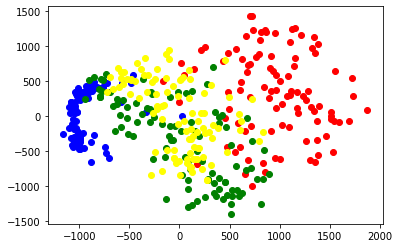

In [115]:
cols = ['red','blue','green','yellow','grey','purple','indigo','black']
for i in classes:
    plt.scatter(X_transformed[ind[i],0],X_transformed[ind[i],1],color = cols[i])

92.12730318257957 %


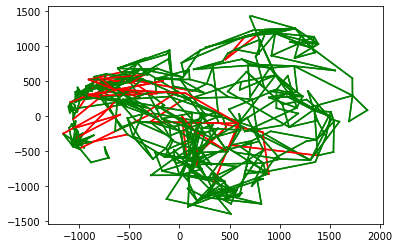

In [116]:
D = getD(X)
A = KnnE(D, k = 2)
visualise(X_transformed, y, A)

In [117]:
md = getMissData(X,freq=0.5)
np.savetxt("file.txt",md)
X2 = imputeMean(md)
D2 = getD(X2)
A2 = KnnE(D2,k= 2)

77.9374471682164 %


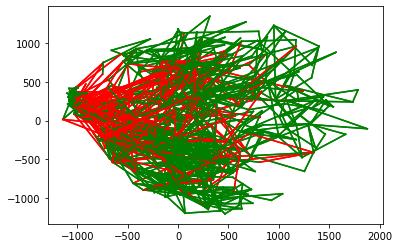

In [88]:
visualise(X_transformed, y, A2)

In [89]:
X3 = imputeKNN(md)
D3 = getD(X3)
A3 = KnnE(D3,k=2)

86.73469387755102 %


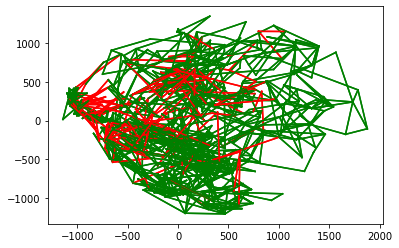

In [90]:
visualise(X_transformed, y, A3)

In [104]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, verbose=2, max_iter=5, tol=1e-10, imputation_order='roman')
imp.fit(md)
X4 = imp.transform(md)

[IterativeImputer] Completing matrix with shape (700, 784)
[IterativeImputer] Ending imputation round 1/5, elapsed time 38.71
[IterativeImputer] Change: 23069.288156857638, scaled tolerance: 2.55e-08 
[IterativeImputer] Ending imputation round 2/5, elapsed time 77.67
[IterativeImputer] Change: 9701.201000345052, scaled tolerance: 2.55e-08 
[IterativeImputer] Ending imputation round 3/5, elapsed time 114.30
[IterativeImputer] Change: 5844.133997751595, scaled tolerance: 2.55e-08 
[IterativeImputer] Ending imputation round 4/5, elapsed time 159.87
[IterativeImputer] Change: 3208.8300715540527, scaled tolerance: 2.55e-08 
[IterativeImputer] Ending imputation round 5/5, elapsed time 201.99
[IterativeImputer] Change: 1496.7981817566124, scaled tolerance: 2.55e-08 
[IterativeImputer] Completing matrix with shape (700, 784)


/usr/local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Ending imputation round 1/5, elapsed time 1.33
[IterativeImputer] Ending imputation round 2/5, elapsed time 2.58
[IterativeImputer] Ending imputation round 3/5, elapsed time 3.87
[IterativeImputer] Ending imputation round 4/5, elapsed time 5.31
[IterativeImputer] Ending imputation round 5/5, elapsed time 6.54


76.39802631578947 %


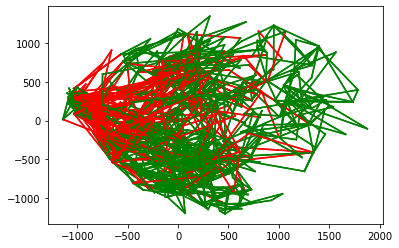

In [105]:
D4 = getD(X4)
A4 = KnnE(D4,k=2)
visualise(X_transformed, y, A4)

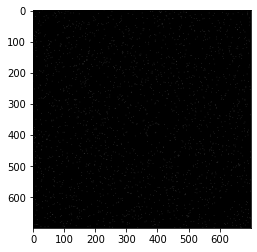

In [106]:
plt.imshow(A.toarray(),cmap='gray')

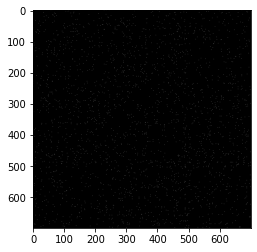

In [103]:
plt.imshow(A2.toarray(),cmap='gray')

In [2]:
R = df[['fnlwgt','Capital-gain','Capital-loss']].to_numpy()
I = df[['Age','Education-num','Hours-per-week']].to_numpy()
C = df[['Workclass','Education','Marital-status','Occupation','Relationship','Race','Sex','Native-country']].to_numpy()

y = df['Class'].to_numpy()
y=y.flatten()
y0 = np.where(y==' <=50K')
y1 = np.where(y==' >50K')
# print(y)

np.put(y,y0,0)
np.put(y,y1,1)
# print(y)
y0 = np.array(y0).flatten()[:amount]
y1 = np.array(y1).flatten()[:amount]

ind = np.append(y0,y1)
np.random.shuffle(ind)


NameError: name 'df' is not defined

In [3]:
df = pd.read_csv("datasets/re_adult.csv")
df['Marital-status'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: Marital-status, dtype: int64

In [ ]:
from keras.datasets import mnist
from scipy.sparse import csr_matrix
(train_X, train_y), (test_X, test_y) = mnist.load_data()
indices = []
classes = list(range(10))
amt = []
for i  in classes:
    ind = list(np.argwhere(train_y == i).flatten())    # indices which belong to class 1
    amt.append(len(ind))
    indices += ind
print(train_X[indices].shape,train_y[indices].shape)
print(np.min(amt))

In [ ]:
from matplotlib import pyplot

In [ ]:
# We will only use digits 1 and 2
train_y = np.array(train_y)
ind1 = np.argwhere(train_y == 1).flatten()    # indices which belong to class 1
ind2 = np.argwhere(train_y == 2).flatten()    # indices which belong to class 2
print(ind1)

In [ ]:
for i in ind1[:6]: 
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [ ]:
np.array(range(10))

In [ ]:
data = [1,1,1,1]
row = [1,2,3,4]
col = [1,2,3,4]

A = csr_matrix()

n = A.get_shape()[0]
acc = np.zeros()
for i in range(n):
    ind = A[i].indices
    cnt = 0
    for j in ind:
        cnt += y[j] == y[i]
    acc[i] = cnt/len(ind)
return acc

In [ ]:
df = pd.read_csv("datasets/adult.data")
df.columns =[
    'Age',
    'Workclass',
    'fnlwgt',
    'Education',
    'Education-num',
    'Marital-status',
    'Occupation',
    'Relationship',
    'Race',
    'Sex',
    'Capital-gain',
    'Capital-loss',
    'Hours-per-week',
    'Native-country',
    'Class',
]
print(df.shape)
for col in df.columns:
    df = df[df[col] != ' ?']
# print(df['Native-country'][13] == ' ?')
print(df.shape)
df.to_csv("datasets/re_adult.csv",index=False)

(32560, 15)
(30161, 15)


In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
X = train_X
y = train_y
X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])

In [5]:
n,d = X.shape
X = minmax(X)
np.savetxt('input.in', X, delimiter=' ')   # X is an array
line_prepender('input.in',f'{n} {d}')


In [7]:
y = y.flatten()
y =  np.array(y,dtype = int)
np.savetxt('labels.txt', y, delimiter=' ')   # X is an array

In [8]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=14, kernel='rbf')
X_transformed = transformer.fit_transform(X)
X_transformed.shape

In [ ]:
n,d = X.shape
X = minmax(X)
np.savetxt('input2.in', X, delimiter=' ')   # X is an array
line_prepender('input2.in',f'{n} {d}')